# Data exploration of SPARCS NYS Health dataset for Broome County
## Correlation between Length of Hospital Stay and other datapoints

## Objective

In this dataset we are interested in finding the relationship between hospital length of stay and other factors, such as age or sex. We'll explore how length of stay affects costs and charges respectively.

We begin by importing the the necessary modules (make sure all dependencies below are met)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn is a Python data visualization library 
# based on matplotlib. It provides a high-level interface for drawing 
# attractive and informative statistical graphics.

import os
import warnings

pd.set_option('display.max_columns', 500)
data=pd.read_csv(r'C:\Users\Hanover\Desktop\SPARCS_data\input\SPARCS_broome_cleaned_final.csv')

print(os.listdir(r'C:\Users\Hanover\Desktop\SPARCS_data\input'))

warnings.filterwarnings('ignore')


['SPARCS_broome_cleaned_final.csv', 'sparcs_dataset_2012.csv', 'SPARCS_data_2012_broome.csv', 'SPARCS_data_2012_broome_cleaned.csv', 'SPARCS_data_2012_broome_cleaned_utf8.csv', 'SPARCS_data_2012_broome_cleaned_utf8.xls']


Now we take a look at the data we have by doing some exploratory data analysis. We can check the subset of data by the "head" method, and check if there is any missing data (there is) with the "info" method. The columns are unmodified and left as is, based on the NYS Health dep standards for medical naming conventions. 

The columns are as follows: 

put column names and a short description here:


## Filtering and making sure Data is in the right format




First, we take a look at our data and see what columns and headers we have. 
Using the "head" method we look at the subset of our data.

In [2]:
print(data.head())

  Hospital County Age Group Gender                    Race          Ethnicity  \
0          Broome    0 - 17      F                   White  Not Span/Hispanic   
1          Broome    0 - 17      M              Other Race   Spanish/Hispanic   
2          Broome    0 - 17      F                   White  Not Span/Hispanic   
3          Broome    0 - 17      M  Black/African American  Not Span/Hispanic   
4          Broome    0 - 17      M  Black/African American  Not Span/Hispanic   

   Length of Stay Type of Admission  Patient Disposition  \
0               1         Emergency    Home or Self Care   
1               1         Emergency  Short-term Hospital   
2               1         Emergency  Short-term Hospital   
3               1         Emergency    Home or Self Care   
4               1          Elective    Home or Self Care   

                           CCS Diagnosis Description  \
0                               Esophageal disorders   
1                         Other perinata

We can also check if we're missing any data with the info method

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Hospital County                      16383 non-null  object 
 1   Age Group                            16383 non-null  object 
 2   Gender                               16383 non-null  object 
 3   Race                                 16383 non-null  object 
 4   Ethnicity                            16383 non-null  object 
 5   Length of Stay                       16383 non-null  int64  
 6   Type of Admission                    16383 non-null  object 
 7   Patient Disposition                  16383 non-null  object 
 8   CCS Diagnosis Description            16383 non-null  object 
 9   CCS Procedure Description            16383 non-null  object 
 10  APR DRG Description                  16383 non-null  object 
 11  APR MDC Description         

If we're not sure we can also use the dtype() method to see the types of our data if we're sure we're not missing any data and just want to verify that pandas has read the headers and data types of the colums correctly. 

In [4]:
print(data.dtypes)

Hospital County                         object
Age Group                               object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                           int64
Type of Admission                       object
Patient Disposition                     object
CCS Diagnosis Description               object
CCS Procedure Description               object
APR DRG Description                     object
APR MDC Description                     object
APR Severity of Illness Description     object
APR Risk of Mortality                   object
APR Medical Surgical Description        object
Emergency Department Indicator          object
Total Charges                          float64
Total Costs                            float64
dtype: object


Thus far the data looks pretty healthy and withing our expectations as far as the data types go. We can now begin some exploratory data analysis. 

Next, we check the statistics for the available data. It can be seen that the Length of stay ranges from minimum 1 hour, to up to 120 hours or more, with an avare of 4 hours of hospital stay. And the total charges range from 131.00 dollars, up to 666,000.00 dollars with an avarage of 16600.00 dollars per patient in the dataset.  

In [5]:
print(data.describe())

       Length of Stay  Total Charges    Total Costs
count    16383.000000   16383.000000   16383.000000
mean         4.597815   16626.413586    7098.370211
std          6.997519   24506.065586   10528.801604
min          1.000000     131.850000      13.760000
25%          2.000000    4033.975000    1993.615000
50%          3.000000    9000.100000    4115.220000
75%          4.000000   20631.250000    8314.925000
max        120.000000  666984.130000  369216.240000


# Plotting

To get an idea of what kind of data we need to plot we need to know which questions are the right ones to ask.

We will attempt to look at a few things and get some insight into our dataset based on these questions:

1. Length of stay as a function of age group.
2. Legnth of stay as a function of gender.
3. Lengh of stay based on the charges.
4. Hospital cost by age group.

Text(0.5, 1.0, 'Effect of Age on LOS')

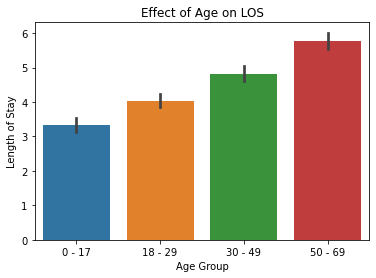

In [6]:
#Length of stay as a function of age

sns.barplot(x='Age Group', y='Length of Stay', data=data)
plt.title('Effect of Age on LOS')

When we're asking "How is length of stay related to age" the above bar plot shows clearly that with increasing age patients seem to spend a lot more time at the hospital than patients in the younger age groups. 

We can stipulate that the patients of age group 50-69 spend an avarage of up to 6 hours. Furthemore we can confirm the average length of stay for patients in that age range with the follwing method.

In [7]:
data_grouped = data.groupby('Age Group').agg({'Length of Stay':'mean'})
data_grouped['Min Length of Stay'] = data.groupby('Age Group').agg({'Length of Stay':'min'})
data_grouped['Max Length of Stay'] = data.groupby('Age Group').agg({'Length of Stay':'max'})
data_grouped

,Length of Stay,Min Length of Stay,Max Length of Stay
Age Group,,,
0 - 17,3.324332,1,87
18 - 29,4.039424,1,83
30 - 49,4.823433,1,120
50 - 69,5.774482,1,120


Similarly when we see how length of stay is affected by age group and gender. 

Text(0.5, 1.0, 'Effect of Age on LOS divided by Gender')

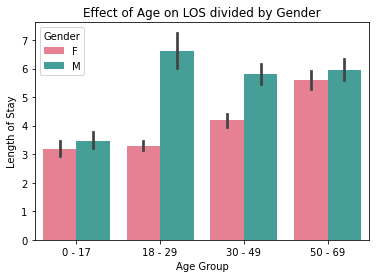

In [8]:
sns.barplot(x='Age Group', y='Length of Stay', hue='Gender', data=data, palette='husl')
plt.title('Effect of Age on LOS divided by Gender')

There is a huge spike in our data on the 18-29 age group for Males. Let's take a look what is the leading cause of this spike in length of stay in patients between in all age groups in Broome County. 

In [9]:
#Let's make a data frame grouped by age and aggregate the mean LOS
data_grouped2 = data.groupby('Age Group').agg({'Length of Stay':'mean'})
#What is the leading medical diagnosis for all patients.
data_grouped2['Medical diagnosis'] = data.groupby('Age Group').agg({'CCS Diagnosis Description':'max'})
data_grouped2

,Length of Stay,Medical diagnosis
Age Group,,
0 - 17,3.324332,Viral infection
18 - 29,4.039424,Viral infection
30 - 49,4.823433,Viral infection
50 - 69,5.774482,Viral infection


We see that viral infections seems to be the leading medical diagnosis for all patients in all age groups. 

Text(0.5, 1.0, 'Total charges of different age groups divided by Gender')

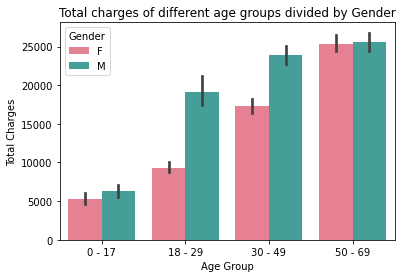

In [10]:
sns.barplot(x='Age Group', y='Total Charges', hue='Gender', data=data, palette='husl')
plt.title('Total charges of different age groups divided by Gender')

In [11]:
#Let's make a data frame grouped by Gender and aggregate the mean LOS
data_grouped3 = data.groupby('Gender').agg({'Length of Stay':'mean'})
#What is the leading medical diagnosis for Male and Female Patients.
data_grouped3['Medical diagnosis'] = data.groupby('Gender').agg({'CCS Diagnosis Description':'max'})
data_grouped3

,Length of Stay,Medical diagnosis
Gender,,
F,4.087463,Viral infection
M,5.306459,Viral infection


The same most occuring medical diagnosis is also aparent for both genders in our dataset, the leading condition being viral infections.  

We can also explore the distribution of charges by gender. Below we see the density of the amount charged by gender. And the results show that Female patients appear to be charge a lot more amounts between 0 and 10k than their counterparts. 

Text(0.5, 1.0, 'Total Charges distribution by gender')

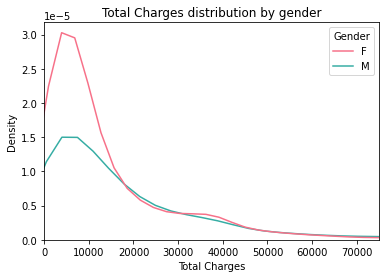

In [12]:
sns.kdeplot( x='Total Charges', hue='Gender', data=data, palette='husl').set(xlim=(0, 75000))
plt.title('Total Charges distribution by gender')

We can compare the amounts of medical diagnosis between genders as follows:

In [13]:
data_grouped4 = data.groupby('Gender').agg({'Gender':'count'})
data_grouped4['Medical Diagnosis Count'] = data.groupby('Gender').agg({'CCS Diagnosis Description':'count'})
data_grouped4

,Gender,Medical Diagnosis Count
Gender,,
F,9524,9524
M,6859,6859


Immediately we can see that our data is skewed because we did not account for the difference between male and female patients. Given that we have about 3000 more female patients the data will be skewed more into that metric. Therefore we cannot make any assumptions on distribution of medical charges. To do that we will need to consider the difference as a percentage of a whole. 

For now though we can see the distributions of medical charges on different age groups. Seeing that younger age groups have more charges below 10k mark and older age groups have more charges above the 10k mark, probably due to more complicated medical procedures that come with age. 

Text(0.5, 1.0, 'Total charges distribution by age group')

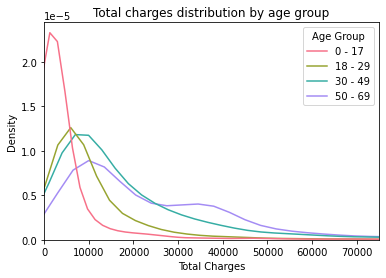

In [14]:
sns.kdeplot( x='Total Charges', hue='Age Group', data=data, palette='husl').set(xlim=(0, 75000))
plt.title('Total charges distribution by age group')

Finally, we can take a look at the relationship between LOS, Medical charges and Age groups with a scatter plot and investigate the relationship between these metrics. 

Text(0.5, 1.0, 'Total charges distribution by Length of Stay, divided by age group')

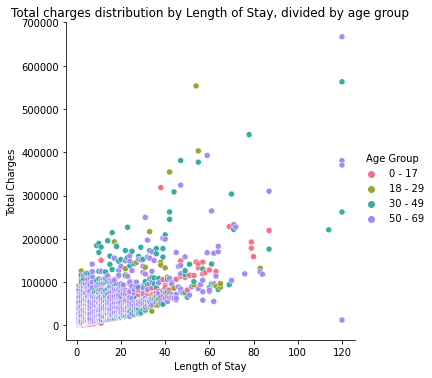

In [15]:
sns.relplot( x='Length of Stay', y = 'Total Charges', hue='Age Group', data=data, palette='husl')
plt.title('Total charges distribution by Length of Stay, divided by age group')

If we want to investigate the relationship between these metrics more closely, we can analyze them seperately with a regression model. To see if Age has a total effect on Length of Stay and Hospital Charges. Looking at the dataset we can confidently assume that that is not the case. 

Text(0.5, 1.0, 'doing something different')

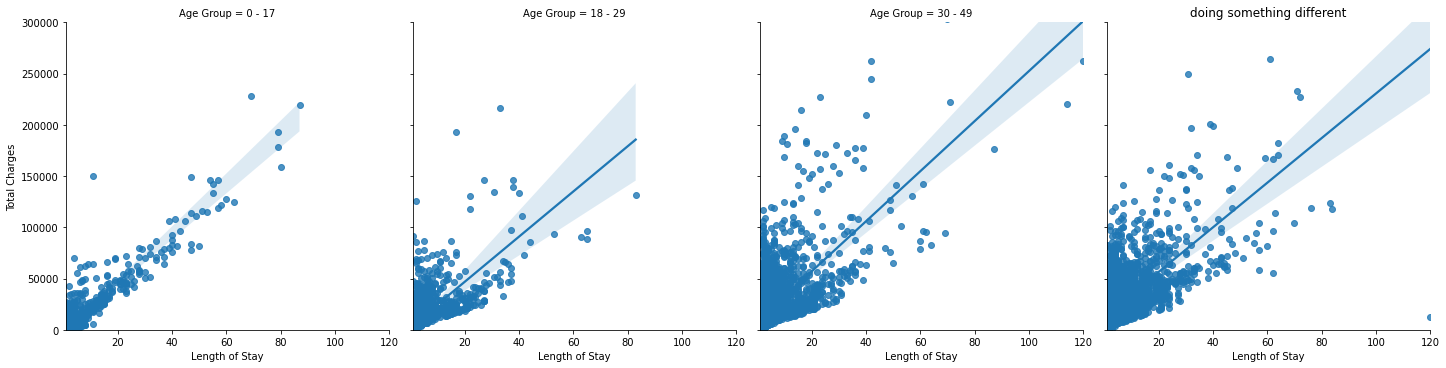

In [16]:
sns.lmplot( x='Length of Stay', y = 'Total Charges', col='Age Group', data=data, palette='husl').set(ylim=(0, 300000))
plt.title('doing something different')

Even when combining the data for all groups we can see that the Charges and Length of stay remain the same. 

Text(0.5, 1.0, 'Effect of LOS and Age on hospital Charges')

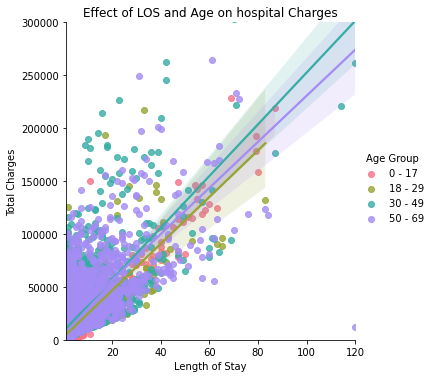

In [17]:
sns.lmplot( x='Length of Stay', y = 'Total Charges', hue='Age Group', data=data, palette='husl').set(ylim=(0, 300000))
plt.title('Effect of LOS and Age on hospital Charges')

But what about Hospital Cost?

Text(0.5, 1.0, 'Effect on LOS and Age on Hospital Cost')

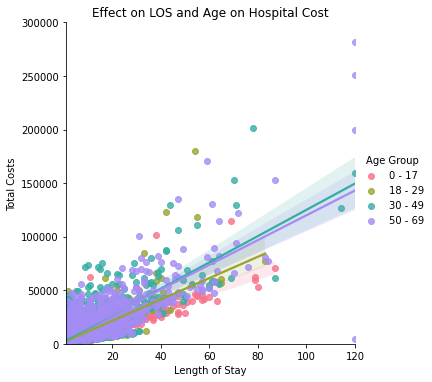

In [18]:
sns.lmplot( x='Length of Stay', y = 'Total Costs', hue='Age Group', data=data, palette='husl').set(ylim=(0, 300000))
plt.title('Effect on LOS and Age on Hospital Cost')

Again it seems, like there isn't enough divergence of the average line of the plot points to assume that the metrics displayed are affected by age in a significant way. 

# Conclusion

More data analysis must be done to see any significant suggestions that Length of Stay or Hospital charges/costs are directly affected by a person age or other metrics like gender etc. 